<a href="https://colab.research.google.com/github/MJVNOR/WorkStatistic/blob/master/Proyecto_tecnol%C3%B3gico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones

In [0]:
#librerias importadas
import matplotlib
#numpy agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.
import numpy as np
#matplotlib es para crear las graficas
import matplotlib.pyplot as plt
#ramdom es para crear numeros aleatorios https://www.w3schools.com/python/module_random.asp
import random
#math son funciones matematicas como py, coseno y seno
import math
import scipy as sp 
import scipy.stats 

def media(a):
    return np.mean(a)

#esta es s^2
def varianza_muestral_3(lista):
    sumatoria_elevada = 0
    sumatoria = 0
    for elemento in lista:
        sumatoria_elevada += (elemento)**2
        sumatoria += (elemento)
    n = len(lista)
    dividendo = sumatoria_elevada - (sumatoria**2/n)
    #print("sumaelevada: ",sumatoria_elevada,"suma: ",sumatoria )
    return (dividendo/(n-1))
    
def desviacionMuestral_s(lista):
    sumatoria_elevada = 0
    sumatoria = 0
    for elemento in lista:
        sumatoria_elevada += (elemento)**2
        sumatoria += (elemento)
    n = len(lista)
    dividendo = sumatoria_elevada - (sumatoria**2/n)
    #print("sumaelevada: ",sumatoria_elevada,"suma: ",sumatoria )
    return math.sqrt((dividendo/(n-1)))

def intervalosDeConfianza(datos, confianza): 
    a = 1.0*np.array(datos)
    n = len(a) 
    m, se = np.mean(a), scipy.stats.sem(a) 
    h = se * sp.stats.t._ppf((1+confianza)/2., n-1) 
    return "m: ",m,"m-: ", m-h,"m+: ", m+h
    
def intervalosDeConfianza2(datos, confianza): 
    a = 1.0*np.array(datos)
    n = len(a) 
    m, se = np.mean(a), scipy.stats.sem(a) 
    h = se * sp.stats.t._ppf((1+confianza)/2., n-1) 
    return m, m-h, m+h

def intervalosDeConfianza3(datos, confianza): 
  a = 1.0*np.array(datos)
  n = len(a) 
  m, se = np.mean(a), scipy.stats.sem(a) 
  h = se * sp.stats.t._ppf((1+confianza)/2., n-1) 
  return m

#Funcion que crea un histograma
def myHistogram(labelx, labely, title, arrangementX, arrangementY):
    plt.plot(arrangementX, arrangementY)
    plt.title(title)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()

def graficoError(cantMuestras, m, muestrasTam, error1,error2, promedio, mu, name):
  plt.figure(figsize=(15,7))
  for i in range(cantMuestras):
    
    if error1[i] <= mu and error2[i] >= mu :
      colores = 'black'
    else:
      colores = 'red' 
    
    error = [[abs(error1[i] - promedio[i])], [abs(error2[i] - promedio[i])]]
    #print(i,":",error)
    plt.errorbar(m[i], muestrasTam[i],fmt = 'o', xerr =error, capsize=5, ecolor = colores)
  
  plt.axvline(58, ls='--', color = "red") 
  nameError = ("Intervalos de confianza del: " + str(name) + "%")
  plt.title(nameError)
  plt.xlabel("Intervalos")
  plt.ylabel("Numero de muestra")
  plt.grid(True, linestyle='--', color='#acacac')

  plt.show()

def reglaDeTres(cienPorciento, numeroAPorcentaje):
  porcentaje = (numeroAPorcentaje * 100) / cienPorciento
  return porcentaje

# Problema

Se truncaron las últimas líneas 5000 del resultado de transmisión.

*******************************************************************************

Muestra # 5186
Muestra Usada: [58.09317575 57.34736066 58.07064989 54.95474987 54.96978996]
Media: 56.68714522729412
Minimo: 54.95474987158781
Maximo: 58.09317575027374
Intervalo de Confianza 90%:  ('m: ', 56.68714522729412, 'm-: ', 55.15893712477977, 'm+: ', 58.215353329808465)
Intervalo de Confianza 95%:  ('m: ', 56.68714522729412, 'm-: ', 54.69685870994413, 'm+: ', 58.6774317446441)
Intervalo de Confianza 99%:  ('m: ', 56.68714522729412, 'm-: ', 53.38671334408336, 'm+: ', 59.98757711050487)

*******************************************************************************

Muestra # 5187
Muestra Usada: [58.20813253 61.09350391 57.66014397 57.44162999 61.470278  ]
Media: 59.174737680486395
Minimo: 57.44162999157491
Maximo: 61.47027800145123
Intervalo de Confianza 90%:  ('m: ', 59.174737680486395, 'm-: ', 57.31726708717905, 'm+: ', 61.03220

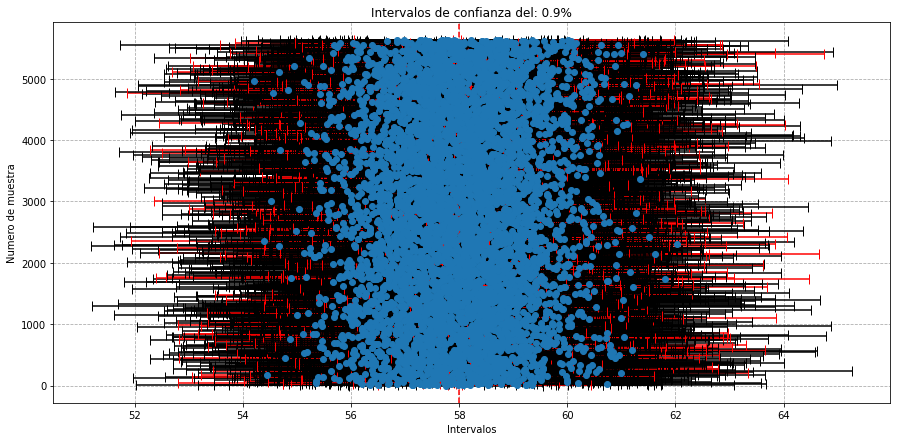

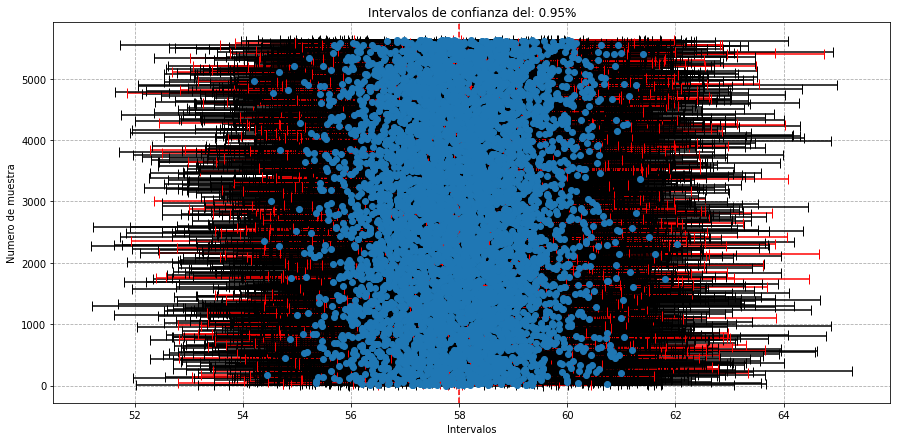

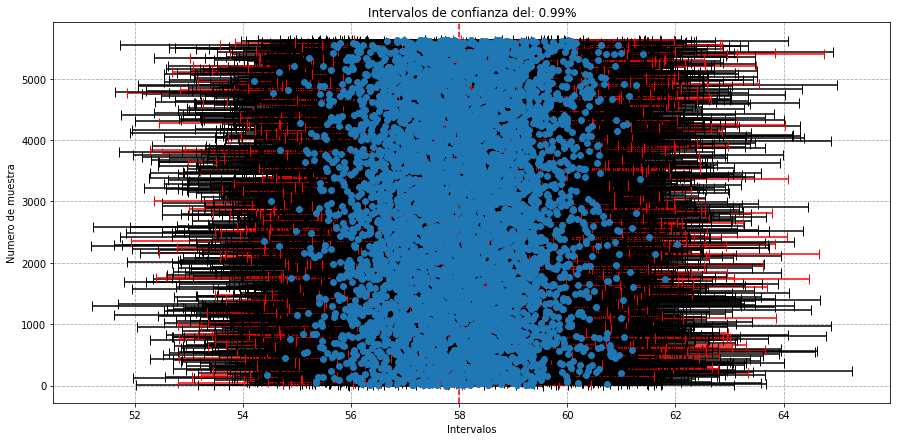

In [16]:
n5 = []
m = []
m2 = []
m3 = []
tres = []
promedio = []
varianza = [] 
desviacion = []
muestrasTam = []
error1 = []
error2 = []

arregloIntervalosAfortunados = []
intervalosAfortunados = 0

arregloIntervalosDesAfortunados = []
intervalosDesAfortunados = 0

arreglointervaloIngualMu = []
intervaloIngualMu = 0

#INGERSAR CANTIDAD DE MUESTRAS
cantMuestras = 5639
#TAMAÑO DE LAS MUESTRAS
tamañoDeLaMuestra = 5
#VALORES DE MU Y SIGMA
mu, sigma = 58, 2.5

################################################################################

for i in range(cantMuestras):
    
    #for j in range(5):
      #n5.append(-(math.log(1-random.random()))/(halflife))
    n5 = np.random.normal(mu, sigma, tamañoDeLaMuestra)
    promedio.append(media(n5))
    varianza.append(varianza_muestral_3(n5))
    desviacion.append(desviacionMuestral_s(n5))

    print("*******************************************************************************")
    print()
    print("Muestra #", i+1,)
    print("Muestra Usada:", n5)
    print("Media:", media(n5))
    print("Minimo:",np.min(n5))
    print("Maximo:",np.max(n5))
    print("Intervalo de Confianza 90%: ",intervalosDeConfianza(n5, 0.90))
    print("Intervalo de Confianza 95%: ",intervalosDeConfianza(n5, 0.95))
    print("Intervalo de Confianza 99%: ",intervalosDeConfianza(n5, 0.99))
    print()

    none, errorMinimo,errorMaximo = intervalosDeConfianza2(n5, 0.90)

    error1.append(errorMinimo)
    error2.append(errorMaximo)

    m.append(intervalosDeConfianza3(n5,0.90))
    m2.append(intervalosDeConfianza3(n5,0.95))
    m3.append(intervalosDeConfianza3(n5,0.99))
    muestrasTam.append(i+1)

    if error1[i] <= mu and error2[i] >= mu :
      intervalosAfortunados += 1
      arregloIntervalosAfortunados.append(m)

    else:
      intervalosDesAfortunados += 1
      arregloIntervalosDesAfortunados.append(m)

    if m == mu :
      intervaloIngualMu += 1
      arreglointervaloIngualMu.append(m)




    n5 = []

print("*******************************************************************************")
################################################################################
print("|Cantidad de elementos:", cantMuestras,"|Cantidad de eventos afortunados: ",intervalosAfortunados, "|Porcentaje:", reglaDeTres(cantMuestras, intervalosAfortunados),"% |Promedio:", media(arregloIntervalosAfortunados))
print("|Cantidad de elementos:", cantMuestras,"|Cantidad de eventos afortunados: ",intervalosDesAfortunados, " |Porcentaje:", reglaDeTres(cantMuestras, intervalosDesAfortunados), "% |Promedio:", media(arregloIntervalosDesAfortunados))
if intervaloIngualMu > 0 :
  print("|Cantidad de elementos:", cantMuestras,"|Cantidad de eventos igual a  mu: ",intervaloIngualMu, " |Porcentaje:", reglaDeTres(cantMuestras, intervaloIngualMu), "% |Promedio:", media(arreglointervaloIngualMu))
else:
  print("|Ningun intervalo es igual a mu")
graficoError(cantMuestras, m, muestrasTam, error1, error2, promedio, mu, 0.90)
graficoError(cantMuestras, m2, muestrasTam, error1, error2, promedio, mu, 0.95)
graficoError(cantMuestras, m3, muestrasTam, error1, error2, promedio, mu, 0.99)
